In [2]:
#importing relevant librares
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

In [3]:
#Reading the dataset
df=pd.read_csv('1time_series_2019-ncov-Confirmed.csv')

In [4]:
df.shape

(487, 65)

In [5]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15,101,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36,138,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.25,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5,112.5,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [6]:
#Dropping unrequired columns from dataset
df = df.drop(['Province/State','Lat','Long'],axis=1)

In [7]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,75,82,114,147,177,212,272,322,411,599
1,Japan,2,1,2,2,4,4,7,7,11,...,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,0,1,3,3,4,5,7,7,10,...,200,212,226,243,266,313,345,385,432,455
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,Malaysia,0,0,0,3,4,4,4,7,8,...,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,Dominica,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
483,Grenada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
484,Mozambique,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
485,Syria,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
df.shape

(487, 62)

In [9]:
df.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
count,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,...,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000,487.000000
mean,1.139630,1.340862,1.932238,2.944559,4.349076,6.010267,11.453799,12.661191,16.907598,20.383984,...,298.137577,320.521561,343.831622,372.745380,404.809035,441.293634,498.373717,558.862423,625.305955,689.845996
std,20.170391,20.253507,25.229268,35.129844,49.109575,66.178567,162.190044,163.249708,224.934544,266.700712,...,3248.509243,3309.559050,3380.171621,3463.800169,3561.212709,3693.726599,3886.851115,4121.144328,4397.961371,4658.551576
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,4.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17.000000,26.000000,31.000000,39.000000,56.000000,68.000000,80.500000,92.000000,125.000000,138.500000
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,67786.000000,67790.000000,67794.000000,67798.000000,67799.000000,67800.000000,67800.000000,67800.000000,67800.000000,67800.000000


In [11]:
#Storing all column names in key variable except the 1st column 
key=df.keys()
key=key[1:]
key

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '02-01-2020', '02-02-2020',
       '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020', '02-07-2020',
       '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '03-01-2020',
       '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020',
       '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020',
       '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

# Task 1 -To drop columns where 70% number of confirmed cases is zero on a particular date

In [12]:
for i in key:
    count=0
    for row in range(487):
        if(df[i][row]==0):
            count+=1
    per=count/487
    if(per>0.71):
        df = df.drop([i],axis=1)

In [13]:
df

,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Thailand,43,47,48,50,50,50,53,59,70,75,82,114,147,177,212,272,322,411,599
1,Japan,331,360,420,461,502,511,581,639,639,701,773,839,825,878,889,924,963,1007,1086
2,Singapore,110,117,130,138,150,150,160,178,178,200,212,226,243,266,313,345,385,432,455
3,Nepal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2
4,Malaysia,50,50,83,93,99,117,129,149,149,197,238,428,566,673,790,900,1030,1183,1306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,Dominica,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
483,Grenada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
484,Mozambique,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
485,Syria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [14]:
df.shape

(487, 20)

In [16]:
#To display all the rows of dataset on jupyter notebook
pd.set_option('display.max_rows', None)

In [21]:
# To remove duplicate countries and get disctinct country values. sum is used to sum up the values for similar countries
df1=df.groupby('Country/Region').sum()
df1 = df1.reset_index()

In [22]:
df1.shape

(171, 20)

In [23]:
df1

,Country/Region,03-04-2020,03-05-2020,03-06-2020,03-07-2020,03-08-2020,03-09-2020,03-10-2020,03-11-2020,03-12-2020,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,Afghanistan,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40
1,Albania,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89
2,Algeria,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201
3,Andorra,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113
4,Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2
5,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
6,Argentina,1,1,2,8,12,12,17,19,19,31,34,45,56,68,79,97,128,158,225
7,Armenia,1,1,1,1,1,1,1,1,4,8,18,26,52,78,84,115,136,160,194
8,Australia,52,55,60,63,76,91,107,128,128,200,250,297,377,452,568,681,791,1071,1314
9,Austria,29,41,55,79,104,131,182,246,302,504,655,860,1018,1332,1646,2013,2388,2814,3244


In [24]:
df1.columns

Index(['Country/Region', '03-04-2020', '03-05-2020', '03-06-2020',
       '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020',
       '03-12-2020', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20',
       '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

# #Task 2 - Plot country wise covid cases

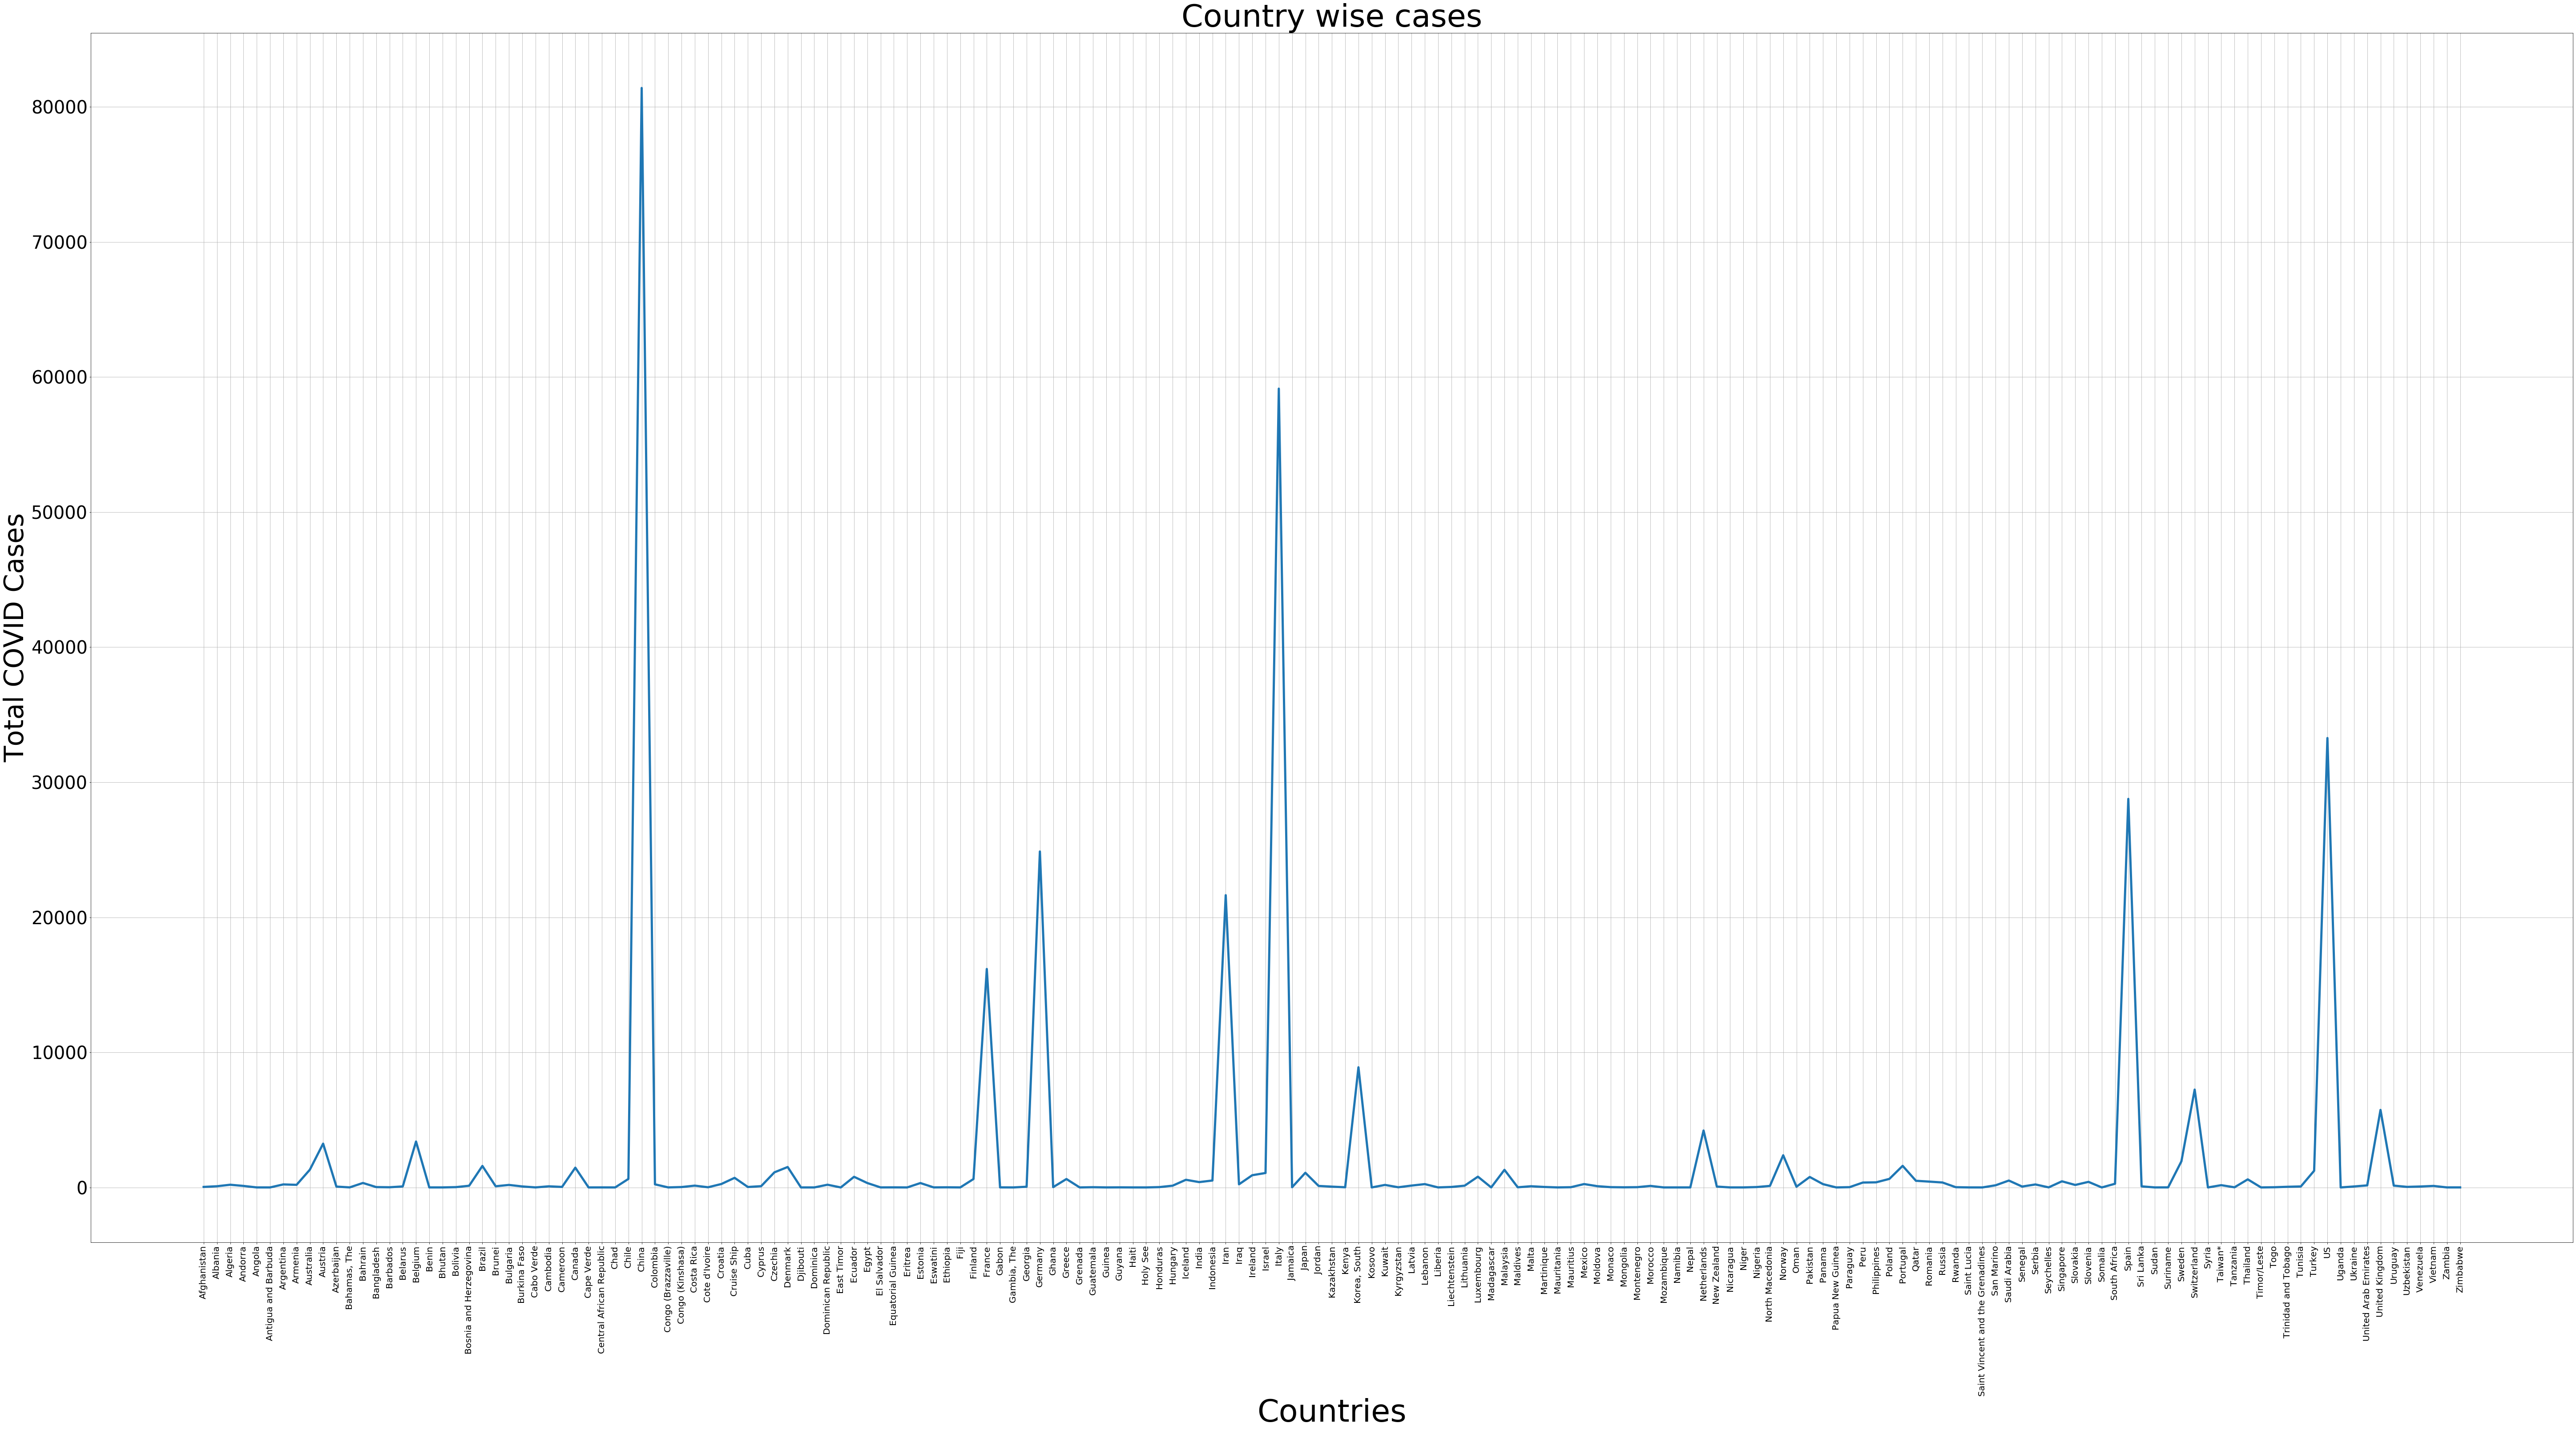

In [27]:
#using matplotlib
plt.figure(figsize=(100,50))
ax=plt.subplot(1,1,1)
x=range(171)
y=df1.iloc[:,-1]
ax.set_xticks(range(171))
# ax.set_yticks(y)
ax.set_xticklabels(df1.iloc[:,0], rotation=90,fontsize=20)
plt.yticks(fontsize=40)
plt.plot(x,y,lw=5)
plt.title('Country wise cases',fontsize=70)
plt.xlabel('Countries',fontsize=70)
plt.ylabel('Total COVID Cases',fontsize=60)
plt.grid()
plt.show()


In [28]:
x_val=df1.keys()
x_val = x_val[1:]
x_val

Index(['03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020',
       '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20',
       '3/20/20', '3/21/20', '3/22/20'],
      dtype='object')

In [29]:
y_val=[]
for i in x_val:
    y_val.append(df[i].sum())
print(y_val)

[95118, 97881, 101784, 105821, 109795, 113561, 118592, 125865, 128343, 145193, 156094, 167446, 181527, 197142, 214910, 242708, 272166, 304524, 335955]


# #Task 3- Plot date wise covid cases

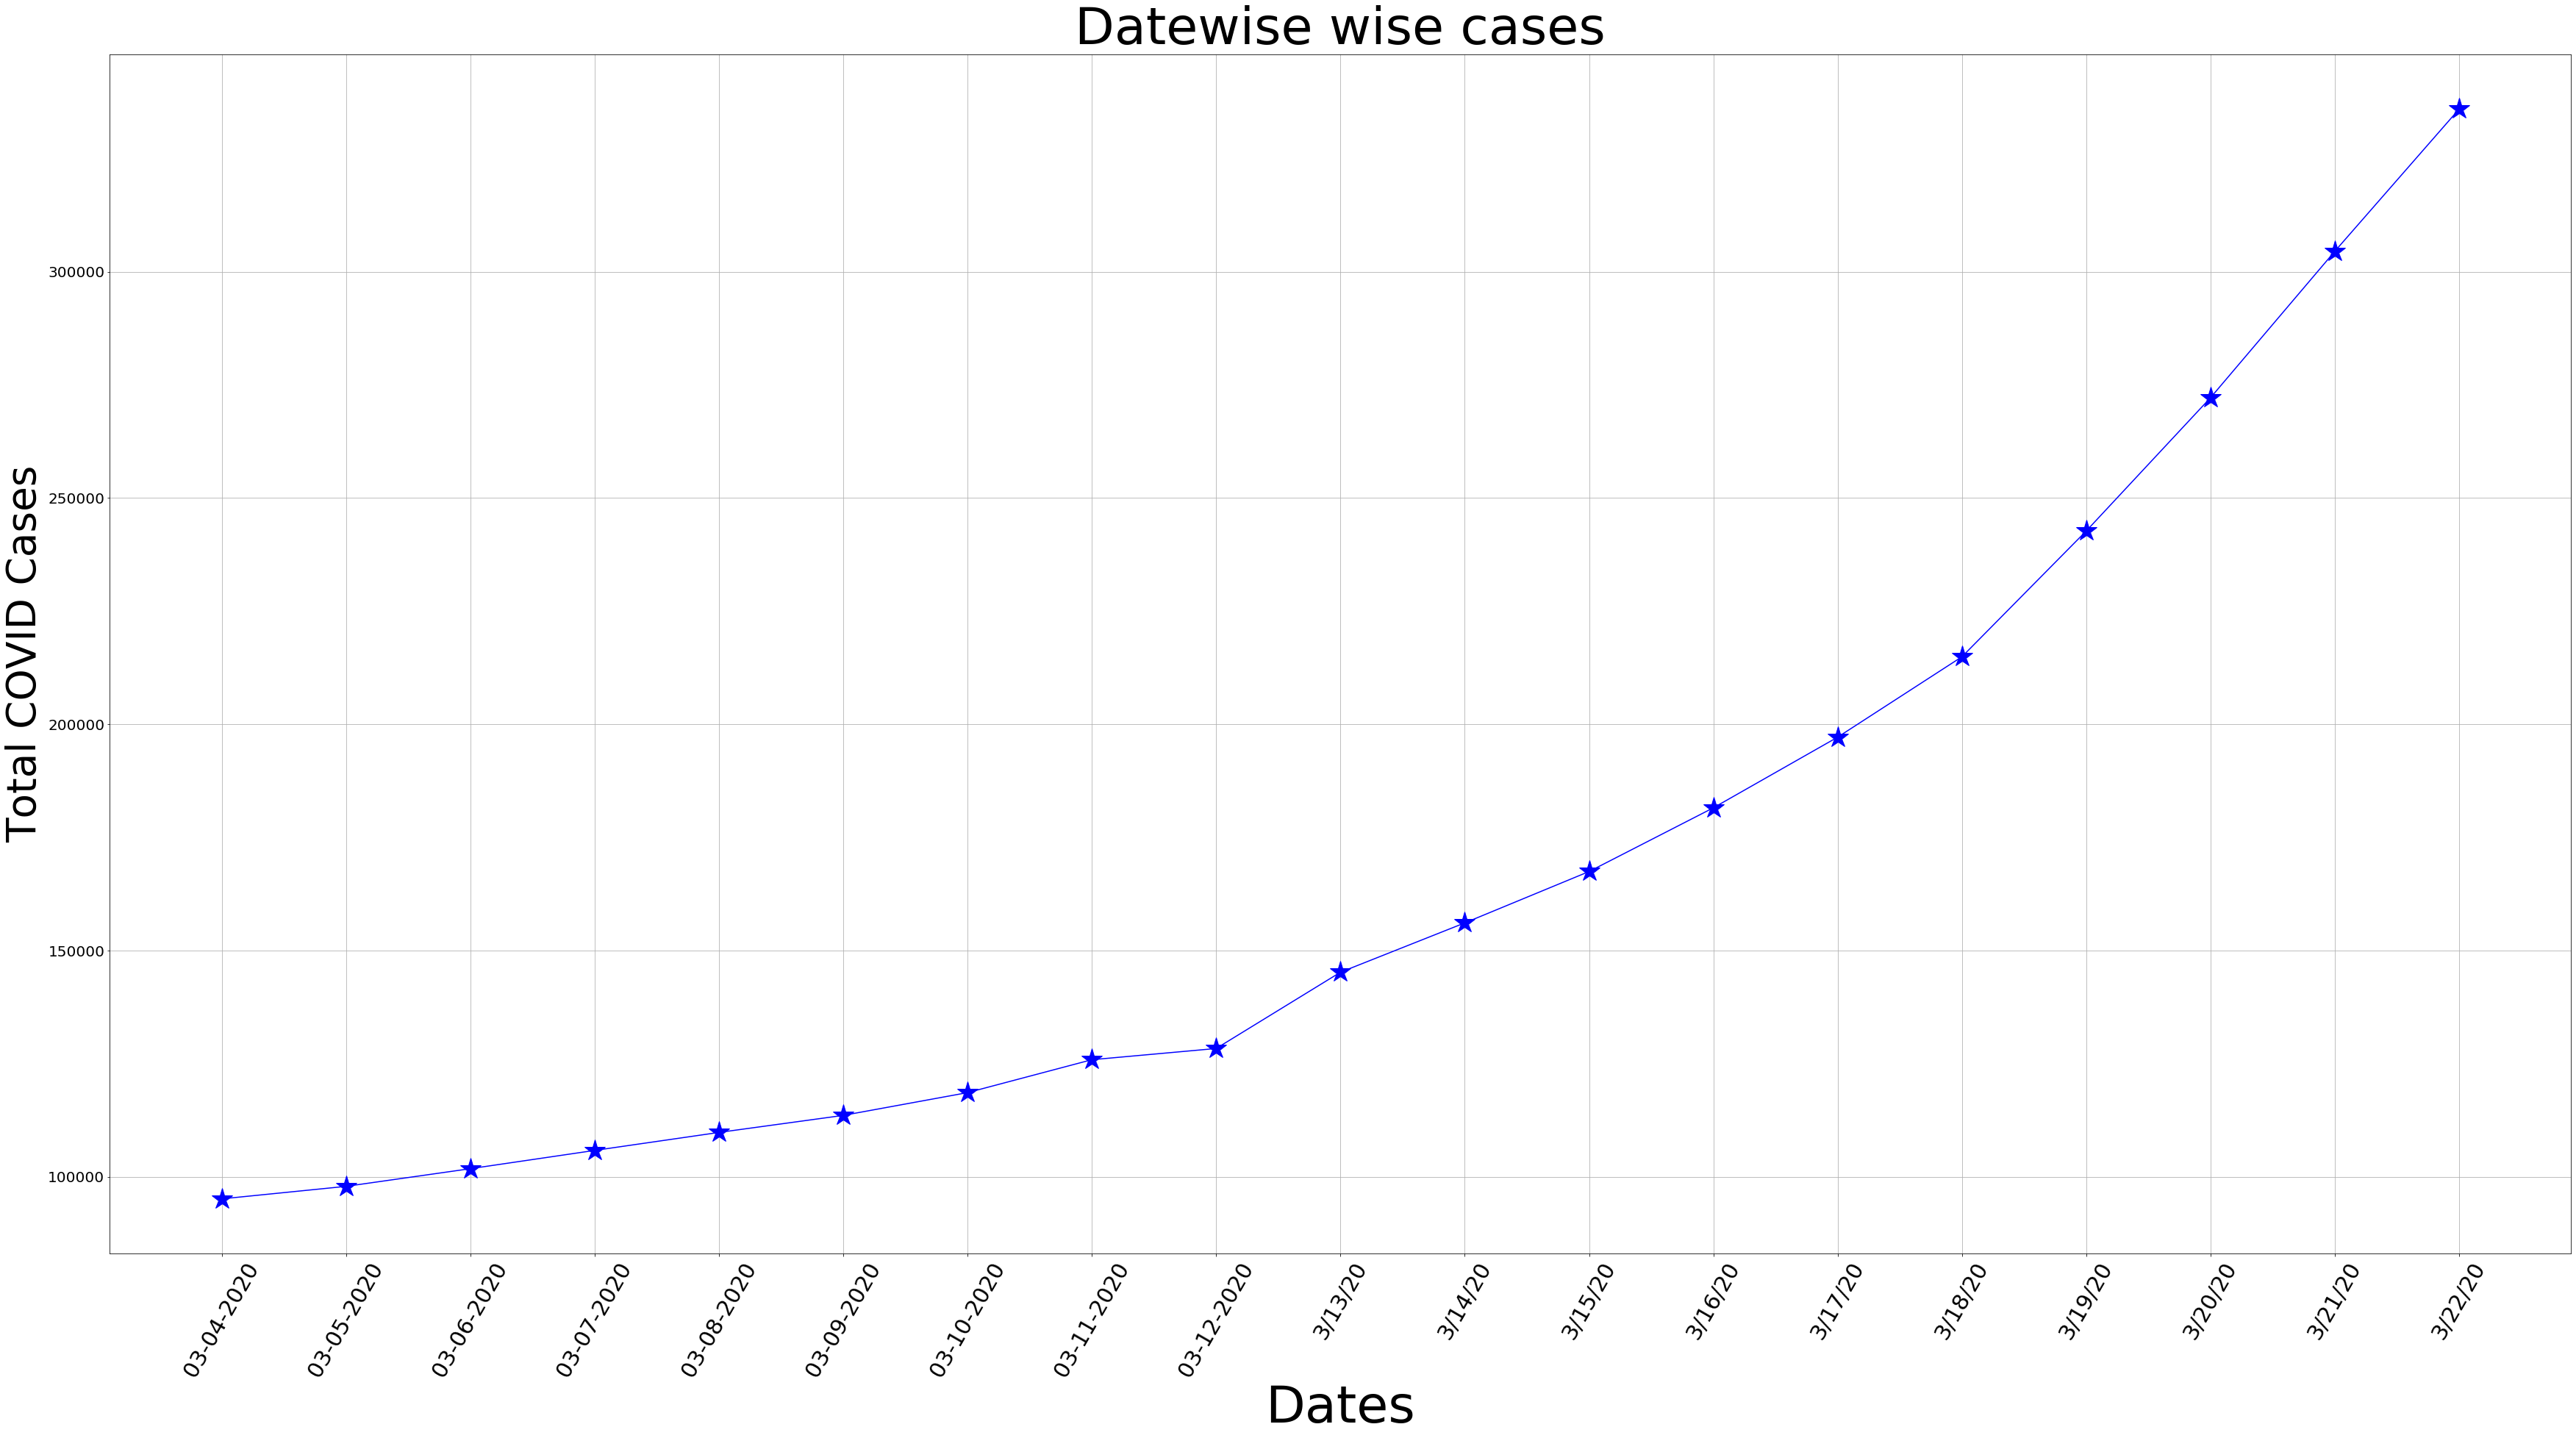

In [30]:
plt.figure(figsize=(60,30))
ax=plt.subplot(1,1,1)
x=range(len(x_val))
y=y_val
# ax.set_yticks(y_val)
plt.yticks(fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(x_val, rotation=60, fontsize=30)
plt.plot(x,y, marker='*',c='blue', markersize=30)
plt.title('Datewise wise cases',fontsize=70)
plt.xlabel('Dates',fontsize=70)
plt.ylabel('Total COVID Cases',fontsize=55)
plt.grid()
plt.show()